In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop.duplicated().sum()

0

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
new_crop = crop.iloc[ : , :7 ]
new_crop.corr()
crop=new_crop

<Axes: >

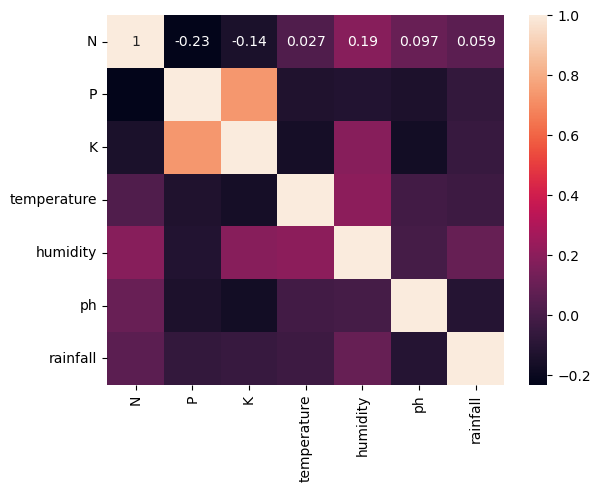

In [10]:
import seaborn as sns
sns.heatmap(crop.corr(), annot=True, cbar=True)

In [11]:
crop.label.value_counts()

AttributeError: 'DataFrame' object has no attribute 'label'

In [ ]:
crop['label'].unique().size

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [ ]:
crop.label.unique()

In [ ]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [ ]:
crop.head()

In [ ]:
crop.label.unique()

In [ ]:
crop.label.value_counts()

In [ ]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

In [ ]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
crop.columns

In [ ]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [ ]:
crop.head()

In [ ]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [ ]:
predict

In [ ]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))